This code comes from https://scikit-learn.org/1.0/auto_examples/exercises/plot_iris_exercise.html

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, model_selection, metrics

Load the iris data, separate independent (X) and dependent (y) variables, and then keep only the first two features (because we are going to plot on a 2D image).

In [52]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [53]:
data_train, data_test, label_train, label_test = model_selection.train_test_split(X, y)

Fit different types of SVM.

Note:
* Linear SVMs are the most basic; you can use them on data with two classes. 
* The error term C says how relaxed the model should be when the data from different classes is mixed in together; this is called "soft margin" in the paper.
* You can also fit non-linear SVMs using something called the "kernel trick". Here, we try RBF and polynomial (degree 3) kernels. This is good when the data isn't separated by a plane (or line).
* You can go beyond two-class classification using one vs rest or one vs one methods. 

In [54]:
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(data_train, label_train) for clf in models)

We have to do some fiddling to support the plots. If any of you have sklearn 1.1.2 a lot of this is baked into that newest version.

In [55]:
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


Let's evaluate and plot!

SVC with linear kernel 0.7894736842105263
LinearSVC (linear kernel) 0.7631578947368421
SVC with RBF kernel 0.7368421052631579
SVC with polynomial (degree 3) kernel 0.7894736842105263


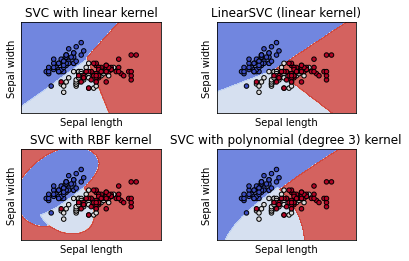

In [56]:
# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    predicted_test = clf.predict(data_test)
    ac_score = metrics.accuracy_score(label_test, predicted_test)
    print(title, ac_score)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

Which kernel works best? 

Why are there differences between the two linear SVMs?

What underlying libraries does sklearn to fit SVMs?

Are there exact solutions for fitting SVMs or are the solutions approximate?

